In [43]:
import torch
inputs = torch.tensor([
    [0.43, 0.15, 0.89], # Your
    [0.55, 0.87, 0.66], # journey
    [0.57, 0.85, 0.64], # starts
    [0.22, 0.58, 0.33], # with
    [0.77, 0.25, 0.10], # one
    [0.05, 0.80, 0.55] # step
])

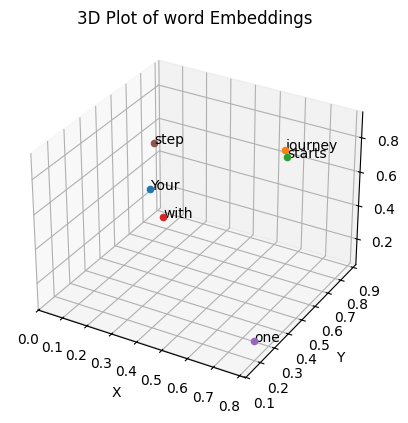

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crossesponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word/token
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x,y,z)
    ax.text(x,y,z, word, fontsize=10)

# Set Labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of word Embeddings')
plt.show()

(0.0, 1.0)

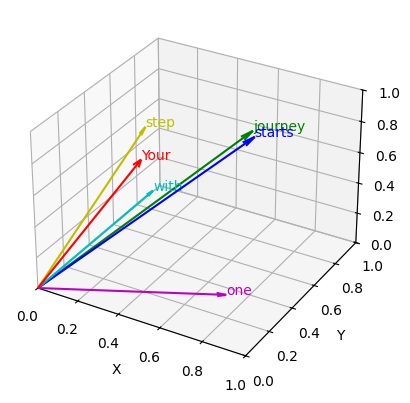

In [45]:
# create 3D with vector from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors =['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for(x,y,z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0,0,0,x,y,z, color=color, arrow_length_ratio=0.05)
    ax.text(x,y,z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

In [46]:
query = inputs[1] # 2nd input token is the query
attention_score_2 = torch.empty(inputs.shape[0])
print("Before dot product", attention_score_2)

for i, x_i in enumerate(inputs):
    attention_score_2[i] = torch.dot(x_i, query) # dot product between query and each input token

print("Attention score", attention_score_2)

Before dot product tensor([0., 0., 0., 0., 0., 0.])
Attention score tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [47]:
query = inputs[2]
attention_score_3 = torch.empty(inputs.shape[0])
print("Before the dot product attention scores:" , attention_score_3)

for i, x_i in enumerate(inputs):
    attention_score_3[i] = torch.dot(x_i, query)
print("Attention score ", attention_score_3)

Before the dot product attention scores: tensor([0., 0., 0., 0., 0., 0.])
Attention score  tensor([0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605])


In [48]:
# for last token
query = inputs[5]
attention_score_6 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attention_score_6[i] = torch.dot(x_i, query)

print(attention_score_6)

# softmax - for normalization
attention_weight_6 = torch.softmax(attention_score_6, dim=0)
print('Attention weights: ', attention_weight_6)
print('Sum: ', attention_weight_6.sum())


context_vector_6 = torch.zeros(query.shape)
# context vector
for i, x_i in enumerate(inputs):
    context_vector_6 += attention_weight_6[i]*x_i
print(context_vector_6)


tensor([0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450])
Attention weights:  tensor([0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896])
Sum:  tensor(1.)
tensor([0.4177, 0.6503, 0.5645])


<div class="alert alert-block alert-success">

We now normalize each row so that the values in
each row sum to 1:

</div>

In [49]:
def softmax_native(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attention_weights_2_native = softmax_native(attention_score_2)
print('Attention weights: ', attention_weights_2_native)
print('Sum: ', attention_weights_2_native.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


*Instaed of writing own softmax we will use torch inbuild softmax function becasue it is more accurate and prevent the denominators ovrflow by substracting the max*

In [50]:
attention_weights_2 = torch.softmax(attention_score_2, dim=0)
print('Attention weights: ', attention_weights_2)
print('Sum: ', attention_weights_2.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


# Final - Multiply with value and Add up

In [51]:
query = inputs[1] # 2nd input token is the query

context_vector_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vector_2 += attention_weights_2[i]*x_i

print(context_vector_2)

tensor([0.4419, 0.6515, 0.5683])


*showing the below code for showing the final context vector for journey word*

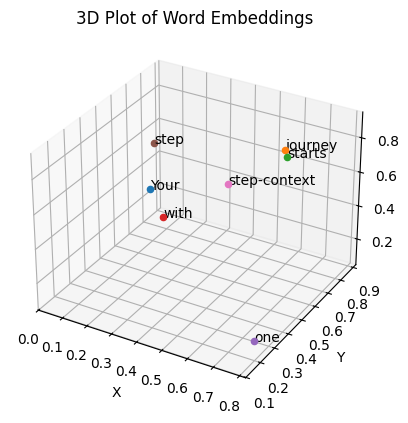

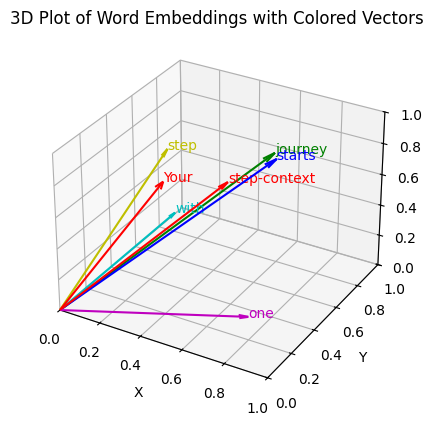

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683],
   [0.4177, 0.6503, 0.5645],  # step-context 
   ]
)

# Corresponding words
# words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']
words = ['Your', 'journey', 'starts', 'with', 'one', 'step','step-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r', 'k']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

# Performing these 3 steps to ALL Tokens

In [53]:
attention_score = torch.empty(6,6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attention_score[i, j] = torch.dot(x_i, x_j)

print(attention_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


* SO , this for loop computionally costly and complicated- then Linear Algbra comes into the picture -- we can do the matrix multiplication - take inputs* input.transpose*

In [54]:
attention_score = inputs @ inputs.T
print(attention_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


*Apply Softmax*

In [55]:
attention_weights = torch.softmax(attention_score, dim=-1)
print(attention_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


<div class="alert alert-block alert-warning">

In the context of using PyTorch, the dim parameter in functions like torch.softmax specifies
the dimension of the input tensor along which the function will be computed. 

By setting
dim=-1, we are instructing the softmax function to apply the normalization along the last
dimension of the attn_scores tensor. 

If attn_scores is a 2D tensor (for example, with a
shape of [rows, columns]), dim=-1 will normalize across the columns so that the values in
each row (summing over the column dimension) sum up to 1.
    
</div>

<div class="alert alert-block alert-success">

Let's briefly verify that
the rows indeed all sum to 1:

</div>

In [56]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attention_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<div class="alert alert-block alert-success">

In the third and last step, we now use these attention weights to compute all context
vectors via matrix multiplication:

</div>

In [57]:
all_context_vector = attention_weights @ inputs
print(all_context_vector)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


<div class="alert alert-block alert-success">

We can double-check that the code is correct by comparing the 2nd row with the context
vector z(2) calculated previously

</div>

In [58]:
print("Previous 2nd context vector:", context_vector_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])
